In [1]:
import torch

from pytorch_lightning import Trainer
from torch.utils.data import DataLoader, random_split

from src.dataset.BraTSDataset import BraTSDataset
from src.models.VAELightning import VAELightning
from src.models.UNet3D_Lightning import UNet3D_Lightning

from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

from monai.metrics.meandice import compute_dice
from monai.metrics.hausdorff_distance import compute_hausdorff_distance
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as anim
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import seaborn as sns
import imageio
from skimage.transform import resize
from skimage.util import montage

In [5]:
#from testing_legacy import test
model_name = "3dunet"

train_path = "/cluster/51/arda/dataset/train"
data = BraTSDataset(train_path, training=False)
print(len(data))
proportions = [0.9, 0.1]
lengths = [int(p * len(data)) for p in proportions]
lengths[-1] = len(data) - sum(lengths[:-1])
print(lengths[0])
print(lengths[1])
gen = torch.Generator()
gen.manual_seed(0)
train, val = torch.utils.data.random_split(
    data, lengths,
    generator=gen
)
best_model_path = "runs/3dunet/best_models/name=0_epoch=46_val_avg_overall_dice=0.85.ckpt"
best_model_vae = "/cluster/51/arda/3D-MRI-Brain-Tumor-Segmentation-with-Double-U-Net/runs/vae/best_models/name=0_epoch=97_val_avg_overall_dice=0.82.ckpt"

val_loader = DataLoader(val, batch_size=1, num_workers=16, pin_memory=True, shuffle=False)

1251
1125
126


In [6]:
model_3dunet = UNet3D_Lightning.load_from_checkpoint(best_model_path, model_name=model_name, volume_shape=data.crop_size)
model_vae = VAELightning.load_from_checkpoint(best_model_vae,volume_shape=data.crop_size,modalities=4, start_channels=32, num_classes=3)

In [12]:
best_double_unet = "/cluster/51/arda/3D-MRI-Brain-Tumor-Segmentation-with-Double-U-Net/runs/double_unet/best_models/name=0_epoch=11_val_avg_overall_dice=0.55.ckpt"
model_double_unet = UNet3D_Lightning.load_from_checkpoint(best_model_path, model_name="double_unet", volume_shape=data.crop_size)

RuntimeError: Error(s) in loading state_dict for UNet3D_Lightning:
	Missing key(s) in state_dict: "model.enc1.model.conv1.weight", "model.enc1.model.bn1.weight", "model.enc1.model.bn1.bias", "model.enc1.model.bn1.running_mean", "model.enc1.model.bn1.running_var", "model.enc1.model.layer1.0.conv1.weight", "model.enc1.model.layer1.0.bn1.weight", "model.enc1.model.layer1.0.bn1.bias", "model.enc1.model.layer1.0.bn1.running_mean", "model.enc1.model.layer1.0.bn1.running_var", "model.enc1.model.layer1.0.conv2.weight", "model.enc1.model.layer1.0.bn2.weight", "model.enc1.model.layer1.0.bn2.bias", "model.enc1.model.layer1.0.bn2.running_mean", "model.enc1.model.layer1.0.bn2.running_var", "model.enc1.model.layer1.1.conv1.weight", "model.enc1.model.layer1.1.bn1.weight", "model.enc1.model.layer1.1.bn1.bias", "model.enc1.model.layer1.1.bn1.running_mean", "model.enc1.model.layer1.1.bn1.running_var", "model.enc1.model.layer1.1.conv2.weight", "model.enc1.model.layer1.1.bn2.weight", "model.enc1.model.layer1.1.bn2.bias", "model.enc1.model.layer1.1.bn2.running_mean", "model.enc1.model.layer1.1.bn2.running_var", "model.enc1.model.layer2.0.conv1.weight", "model.enc1.model.layer2.0.bn1.weight", "model.enc1.model.layer2.0.bn1.bias", "model.enc1.model.layer2.0.bn1.running_mean", "model.enc1.model.layer2.0.bn1.running_var", "model.enc1.model.layer2.0.conv2.weight", "model.enc1.model.layer2.0.bn2.weight", "model.enc1.model.layer2.0.bn2.bias", "model.enc1.model.layer2.0.bn2.running_mean", "model.enc1.model.layer2.0.bn2.running_var", "model.enc1.model.layer2.1.conv1.weight", "model.enc1.model.layer2.1.bn1.weight", "model.enc1.model.layer2.1.bn1.bias", "model.enc1.model.layer2.1.bn1.running_mean", "model.enc1.model.layer2.1.bn1.running_var", "model.enc1.model.layer2.1.conv2.weight", "model.enc1.model.layer2.1.bn2.weight", "model.enc1.model.layer2.1.bn2.bias", "model.enc1.model.layer2.1.bn2.running_mean", "model.enc1.model.layer2.1.bn2.running_var", "model.enc1.model.layer3.0.conv1.weight", "model.enc1.model.layer3.0.bn1.weight", "model.enc1.model.layer3.0.bn1.bias", "model.enc1.model.layer3.0.bn1.running_mean", "model.enc1.model.layer3.0.bn1.running_var", "model.enc1.model.layer3.0.conv2.weight", "model.enc1.model.layer3.0.bn2.weight", "model.enc1.model.layer3.0.bn2.bias", "model.enc1.model.layer3.0.bn2.running_mean", "model.enc1.model.layer3.0.bn2.running_var", "model.enc1.model.layer3.1.conv1.weight", "model.enc1.model.layer3.1.bn1.weight", "model.enc1.model.layer3.1.bn1.bias", "model.enc1.model.layer3.1.bn1.running_mean", "model.enc1.model.layer3.1.bn1.running_var", "model.enc1.model.layer3.1.conv2.weight", "model.enc1.model.layer3.1.bn2.weight", "model.enc1.model.layer3.1.bn2.bias", "model.enc1.model.layer3.1.bn2.running_mean", "model.enc1.model.layer3.1.bn2.running_var", "model.enc1.model.layer4.0.conv1.weight", "model.enc1.model.layer4.0.bn1.weight", "model.enc1.model.layer4.0.bn1.bias", "model.enc1.model.layer4.0.bn1.running_mean", "model.enc1.model.layer4.0.bn1.running_var", "model.enc1.model.layer4.0.conv2.weight", "model.enc1.model.layer4.0.bn2.weight", "model.enc1.model.layer4.0.bn2.bias", "model.enc1.model.layer4.0.bn2.running_mean", "model.enc1.model.layer4.0.bn2.running_var", "model.enc1.model.layer4.1.conv1.weight", "model.enc1.model.layer4.1.bn1.weight", "model.enc1.model.layer4.1.bn1.bias", "model.enc1.model.layer4.1.bn1.running_mean", "model.enc1.model.layer4.1.bn1.running_var", "model.enc1.model.layer4.1.conv2.weight", "model.enc1.model.layer4.1.bn2.weight", "model.enc1.model.layer4.1.bn2.bias", "model.enc1.model.layer4.1.bn2.running_mean", "model.enc1.model.layer4.1.bn2.running_var", "model.dec1.dec1.conv.double_conv.0.weight", "model.dec1.dec1.conv.double_conv.0.bias", "model.dec1.dec1.conv.double_conv.1.weight", "model.dec1.dec1.conv.double_conv.1.bias", "model.dec1.dec1.conv.double_conv.3.weight", "model.dec1.dec1.conv.double_conv.3.bias", "model.dec1.dec1.conv.double_conv.4.weight", "model.dec1.dec1.conv.double_conv.4.bias", "model.dec1.dec2.conv.double_conv.0.weight", "model.dec1.dec2.conv.double_conv.0.bias", "model.dec1.dec2.conv.double_conv.1.weight", "model.dec1.dec2.conv.double_conv.1.bias", "model.dec1.dec2.conv.double_conv.3.weight", "model.dec1.dec2.conv.double_conv.3.bias", "model.dec1.dec2.conv.double_conv.4.weight", "model.dec1.dec2.conv.double_conv.4.bias", "model.dec1.dec3.conv.double_conv.0.weight", "model.dec1.dec3.conv.double_conv.0.bias", "model.dec1.dec3.conv.double_conv.1.weight", "model.dec1.dec3.conv.double_conv.1.bias", "model.dec1.dec3.conv.double_conv.3.weight", "model.dec1.dec3.conv.double_conv.3.bias", "model.dec1.dec3.conv.double_conv.4.weight", "model.dec1.dec3.conv.double_conv.4.bias", "model.dec1.dec4.conv.double_conv.0.weight", "model.dec1.dec4.conv.double_conv.0.bias", "model.dec1.dec4.conv.double_conv.1.weight", "model.dec1.dec4.conv.double_conv.1.bias", "model.dec1.dec4.conv.double_conv.3.weight", "model.dec1.dec4.conv.double_conv.3.bias", "model.dec1.dec4.conv.double_conv.4.weight", "model.dec1.dec4.conv.double_conv.4.bias", "model.dec1.out.conv.weight", "model.dec1.out.conv.bias", "model.enc2.conv.double_conv.0.weight", "model.enc2.conv.double_conv.0.bias", "model.enc2.conv.double_conv.1.weight", "model.enc2.conv.double_conv.1.bias", "model.enc2.conv.double_conv.3.weight", "model.enc2.conv.double_conv.3.bias", "model.enc2.conv.double_conv.4.weight", "model.enc2.conv.double_conv.4.bias", "model.enc2.enc1.encoder.1.double_conv.0.weight", "model.enc2.enc1.encoder.1.double_conv.0.bias", "model.enc2.enc1.encoder.1.double_conv.1.weight", "model.enc2.enc1.encoder.1.double_conv.1.bias", "model.enc2.enc1.encoder.1.double_conv.3.weight", "model.enc2.enc1.encoder.1.double_conv.3.bias", "model.enc2.enc1.encoder.1.double_conv.4.weight", "model.enc2.enc1.encoder.1.double_conv.4.bias", "model.enc2.enc2.encoder.1.double_conv.0.weight", "model.enc2.enc2.encoder.1.double_conv.0.bias", "model.enc2.enc2.encoder.1.double_conv.1.weight", "model.enc2.enc2.encoder.1.double_conv.1.bias", "model.enc2.enc2.encoder.1.double_conv.3.weight", "model.enc2.enc2.encoder.1.double_conv.3.bias", "model.enc2.enc2.encoder.1.double_conv.4.weight", "model.enc2.enc2.encoder.1.double_conv.4.bias", "model.enc2.enc3.encoder.1.double_conv.0.weight", "model.enc2.enc3.encoder.1.double_conv.0.bias", "model.enc2.enc3.encoder.1.double_conv.1.weight", "model.enc2.enc3.encoder.1.double_conv.1.bias", "model.enc2.enc3.encoder.1.double_conv.3.weight", "model.enc2.enc3.encoder.1.double_conv.3.bias", "model.enc2.enc3.encoder.1.double_conv.4.weight", "model.enc2.enc3.encoder.1.double_conv.4.bias", "model.enc2.enc4.encoder.1.double_conv.0.weight", "model.enc2.enc4.encoder.1.double_conv.0.bias", "model.enc2.enc4.encoder.1.double_conv.1.weight", "model.enc2.enc4.encoder.1.double_conv.1.bias", "model.enc2.enc4.encoder.1.double_conv.3.weight", "model.enc2.enc4.encoder.1.double_conv.3.bias", "model.enc2.enc4.encoder.1.double_conv.4.weight", "model.enc2.enc4.encoder.1.double_conv.4.bias", "model.dec2.dec1.conv.double_conv.0.weight", "model.dec2.dec1.conv.double_conv.0.bias", "model.dec2.dec1.conv.double_conv.1.weight", "model.dec2.dec1.conv.double_conv.1.bias", "model.dec2.dec1.conv.double_conv.3.weight", "model.dec2.dec1.conv.double_conv.3.bias", "model.dec2.dec1.conv.double_conv.4.weight", "model.dec2.dec1.conv.double_conv.4.bias", "model.dec2.dec2.conv.double_conv.0.weight", "model.dec2.dec2.conv.double_conv.0.bias", "model.dec2.dec2.conv.double_conv.1.weight", "model.dec2.dec2.conv.double_conv.1.bias", "model.dec2.dec2.conv.double_conv.3.weight", "model.dec2.dec2.conv.double_conv.3.bias", "model.dec2.dec2.conv.double_conv.4.weight", "model.dec2.dec2.conv.double_conv.4.bias", "model.dec2.dec3.conv.double_conv.0.weight", "model.dec2.dec3.conv.double_conv.0.bias", "model.dec2.dec3.conv.double_conv.1.weight", "model.dec2.dec3.conv.double_conv.1.bias", "model.dec2.dec3.conv.double_conv.3.weight", "model.dec2.dec3.conv.double_conv.3.bias", "model.dec2.dec3.conv.double_conv.4.weight", "model.dec2.dec3.conv.double_conv.4.bias", "model.dec2.dec4.conv.double_conv.0.weight", "model.dec2.dec4.conv.double_conv.0.bias", "model.dec2.dec4.conv.double_conv.1.weight", "model.dec2.dec4.conv.double_conv.1.bias", "model.dec2.dec4.conv.double_conv.3.weight", "model.dec2.dec4.conv.double_conv.3.bias", "model.dec2.dec4.conv.double_conv.4.weight", "model.dec2.dec4.conv.double_conv.4.bias", "model.dec2.out.conv.weight", "model.dec2.out.conv.bias", "model.out_conv.double_conv.0.weight", "model.out_conv.double_conv.0.bias", "model.out_conv.double_conv.1.weight", "model.out_conv.double_conv.1.bias", "model.out_conv.double_conv.3.weight", "model.out_conv.double_conv.3.bias". 
	Unexpected key(s) in state_dict: "model.conv.double_conv.0.weight", "model.conv.double_conv.0.bias", "model.conv.double_conv.1.weight", "model.conv.double_conv.1.bias", "model.conv.double_conv.3.weight", "model.conv.double_conv.3.bias", "model.conv.double_conv.4.weight", "model.conv.double_conv.4.bias", "model.enc3.encoder.1.double_conv.0.weight", "model.enc3.encoder.1.double_conv.0.bias", "model.enc3.encoder.1.double_conv.1.weight", "model.enc3.encoder.1.double_conv.1.bias", "model.enc3.encoder.1.double_conv.3.weight", "model.enc3.encoder.1.double_conv.3.bias", "model.enc3.encoder.1.double_conv.4.weight", "model.enc3.encoder.1.double_conv.4.bias", "model.enc4.encoder.1.double_conv.0.weight", "model.enc4.encoder.1.double_conv.0.bias", "model.enc4.encoder.1.double_conv.1.weight", "model.enc4.encoder.1.double_conv.1.bias", "model.enc4.encoder.1.double_conv.3.weight", "model.enc4.encoder.1.double_conv.3.bias", "model.enc4.encoder.1.double_conv.4.weight", "model.enc4.encoder.1.double_conv.4.bias", "model.dec3.conv.double_conv.0.weight", "model.dec3.conv.double_conv.0.bias", "model.dec3.conv.double_conv.1.weight", "model.dec3.conv.double_conv.1.bias", "model.dec3.conv.double_conv.3.weight", "model.dec3.conv.double_conv.3.bias", "model.dec3.conv.double_conv.4.weight", "model.dec3.conv.double_conv.4.bias", "model.dec4.conv.double_conv.0.weight", "model.dec4.conv.double_conv.0.bias", "model.dec4.conv.double_conv.1.weight", "model.dec4.conv.double_conv.1.bias", "model.dec4.conv.double_conv.3.weight", "model.dec4.conv.double_conv.3.bias", "model.dec4.conv.double_conv.4.weight", "model.dec4.conv.double_conv.4.bias", "model.out.conv.weight", "model.out.conv.bias", "model.enc1.encoder.1.double_conv.0.weight", "model.enc1.encoder.1.double_conv.0.bias", "model.enc1.encoder.1.double_conv.1.weight", "model.enc1.encoder.1.double_conv.1.bias", "model.enc1.encoder.1.double_conv.3.weight", "model.enc1.encoder.1.double_conv.3.bias", "model.enc1.encoder.1.double_conv.4.weight", "model.enc1.encoder.1.double_conv.4.bias", "model.dec1.conv.double_conv.0.weight", "model.dec1.conv.double_conv.0.bias", "model.dec1.conv.double_conv.1.weight", "model.dec1.conv.double_conv.1.bias", "model.dec1.conv.double_conv.3.weight", "model.dec1.conv.double_conv.3.bias", "model.dec1.conv.double_conv.4.weight", "model.dec1.conv.double_conv.4.bias", "model.enc2.encoder.1.double_conv.0.weight", "model.enc2.encoder.1.double_conv.0.bias", "model.enc2.encoder.1.double_conv.1.weight", "model.enc2.encoder.1.double_conv.1.bias", "model.enc2.encoder.1.double_conv.3.weight", "model.enc2.encoder.1.double_conv.3.bias", "model.enc2.encoder.1.double_conv.4.weight", "model.enc2.encoder.1.double_conv.4.bias", "model.dec2.conv.double_conv.0.weight", "model.dec2.conv.double_conv.0.bias", "model.dec2.conv.double_conv.1.weight", "model.dec2.conv.double_conv.1.bias", "model.dec2.conv.double_conv.3.weight", "model.dec2.conv.double_conv.3.bias", "model.dec2.conv.double_conv.4.weight", "model.dec2.conv.double_conv.4.bias". 

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predictions_3dunet = []
model_3dunet.to(device)
model_3dunet.eval()
val_inputs = []
val_targets = []
count=0
with torch.no_grad():
    for train_features, train_labels in tqdm(val_loader):
        if count==10:
            break
        val_inputs.append(train_features)
        val_targets.append(train_labels)
        train_features = train_features.to(device)
        train_labels = train_labels.to(device)
        y_hat = model_3dunet(train_features)
        predictions_3dunet.append(y_hat)
        count += 1

#print(predictions.shape)

  8%|██████▌                                                                           | 10/126 [00:14<02:47,  1.44s/it]


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predictions_vae = []
model_vae.to(device)
model_vae.eval()
count=0
with torch.no_grad():
    for train_features, train_labels in tqdm(val_loader):
        if count==10:
            break
        train_features = train_features.to(device)
        train_labels = train_labels.to(device)
        y_hat = model_vae(train_features)
        predictions_vae.append(y_hat)
        count += 1

#print(predictions.shape)

  8%|██████▌                                                                           | 10/126 [00:14<02:47,  1.45s/it]


In [9]:
def visualize_2D(pred, inputs, targets):
    
    slice_idx = 80
    # get input images and ground truth mask
    ["t1", "t2", "t1ce", "flair", "seg"]
    
    inputs = inputs.squeeze().numpy()
    targets = targets.squeeze().numpy()
    t1 = inputs[0][:,:,slice_idx]
    t2 = inputs[1][:,:,slice_idx]
    t1ce = inputs[2][:,:,slice_idx]
    flair = inputs[3][:,:,slice_idx]
    target_wt = targets[0][:,:,slice_idx]
    target_tc = targets[1][:,:,slice_idx]
    target_et = targets[2][:,:,slice_idx]
    
    # get prediction
    predicted_mask = pred.cpu().squeeze().numpy()
    pred_WT = predicted_mask[0][:,:,slice_idx]
    pred_TC = predicted_mask[1][:,:,slice_idx]
    pred_ET = predicted_mask[2][:,:,slice_idx]
    
    
    fig = plt.figure(figsize=(20, 10))

    # Input Image
    plt.subplot(151)
    plt.imshow(t1)
    plt.title('T1')
    
    # Input Image
    plt.subplot(152)
    plt.imshow(t1ce)
    plt.title('T1CE')
    
    # Input Image
    plt.subplot(153)
    plt.imshow(t2)
    plt.title('T1')
    
    # Input Image
    plt.subplot(154)
    plt.imshow(flair)
    plt.title('FLAIR')
    plt.show()
    
    
    fig = plt.figure(figsize=(20, 10))
    # Ground Truth Mask
    plt.subplot(151)
    plt.imshow(target_wt)
    plt.title('Ground Truth WT')
    
        # Ground Truth Mask
    plt.subplot(152)
    plt.imshow(target_tc)
    plt.title('Ground Truth TC')
    
    
        # Ground Truth Mask
    plt.subplot(153)
    plt.imshow(target_et)
    plt.title('Ground Truth ET')
    plt.show()
    
    fig = plt.figure(figsize=(20, 10))
    # WT Predicted Mask
    plt.subplot(151)
    plt.imshow(pred_WT)
    plt.title('WT Predicted Mask')

    # TC Predicted Mask
    plt.subplot(152)
    plt.imshow(pred_TC)
    plt.title('TC Predicted Mask')

    # ET Predicted Mask
    plt.subplot(153)
    plt.imshow(pred_ET)
    plt.title('ET Predicted Mask')
    plt.show()
    

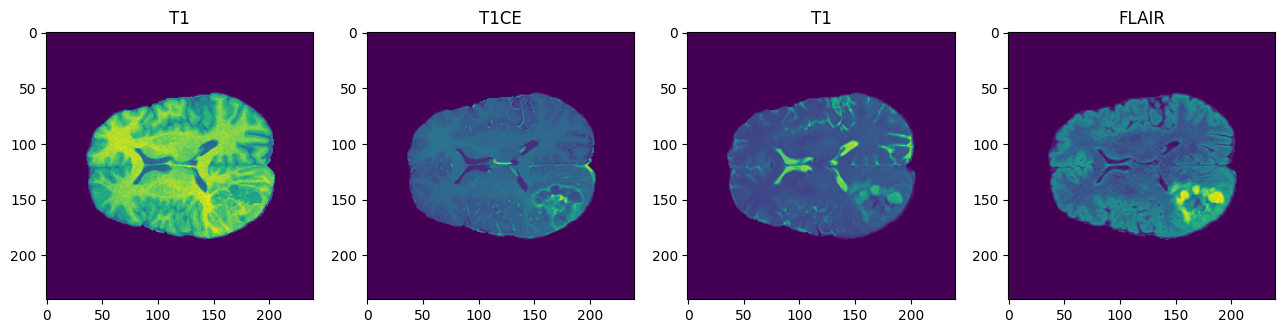

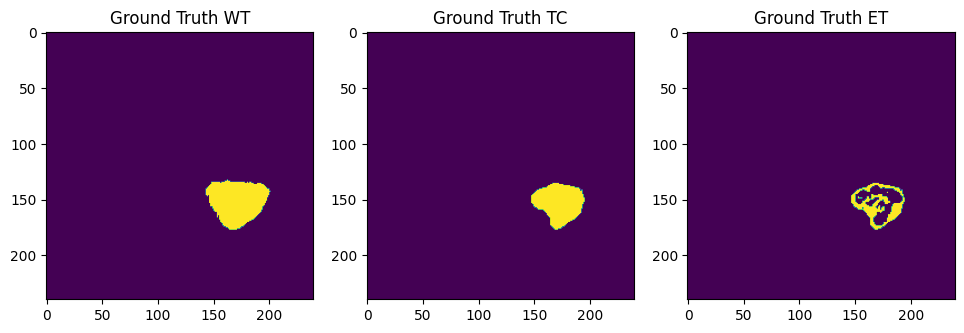

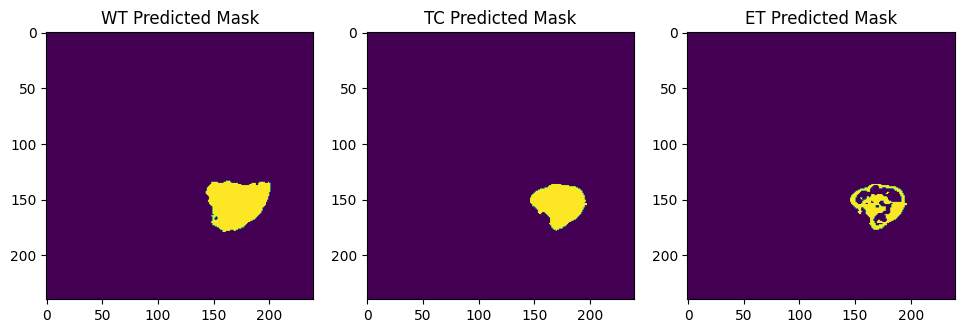

In [10]:
idx = 2
pred = predictions_3dunet[idx]
inputs = val_inputs[idx]
target = val_targets[idx]

visualize_2D(pred, inputs, target)

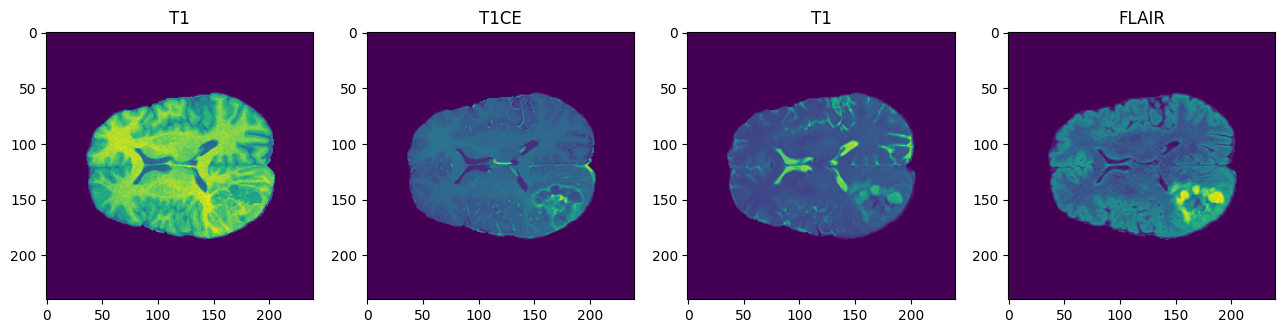

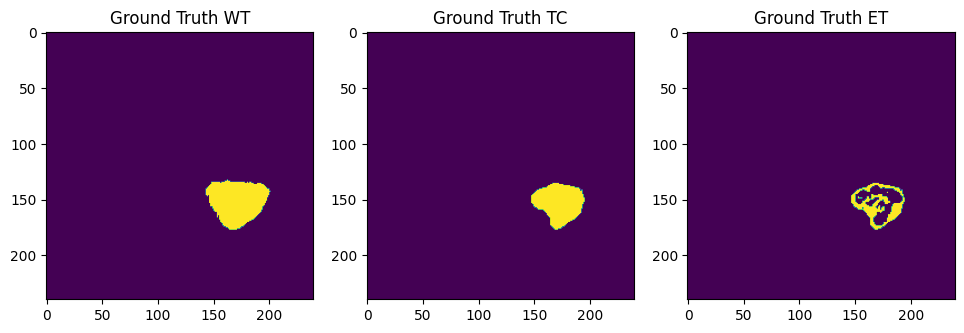

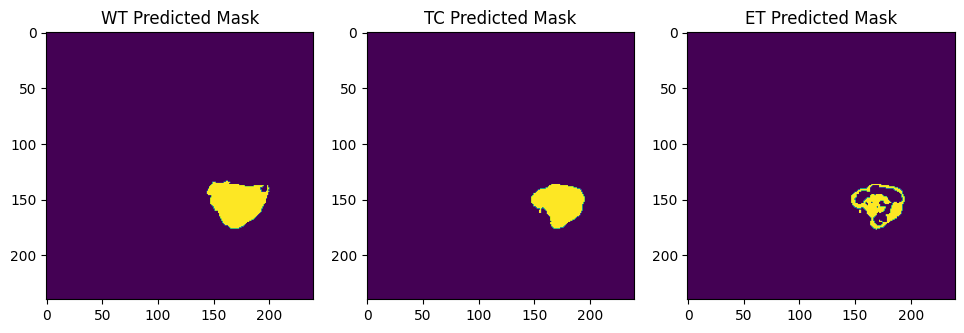

In [11]:
idx = 2
pred = predictions_vae[idx]
inputs = val_inputs[idx]
target = val_targets[idx]

visualize_2D(pred, inputs, target)